In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

In [60]:
df = pd.read_csv('../Felles/TrondheimHousingDataCleaned.csv', 
                 usecols = ['Primary room', 'Usable area', 'Gross area', 
                            'Year of construction', 'Floor', 'Plot size', 
                            'Price', 'Joint debt at last sale', 
                            'Total price at last sale', 'Number of rooms', 
                            'Number of bedrooms', 'Turnover rate', 'Postal code', 
                            'Broker encoded', 'Housing type encoded', 
                            'Balcony_Yes', 'Parking_Yes', 'Lat', 'Lon'])

In [61]:
X = df.drop(columns = ['Price', 'Total price at last sale'])
y = df['Total price at last sale']

In [62]:
model = LinearRegression().fit(X, y)

In [63]:
y_pred = model.predict(X)

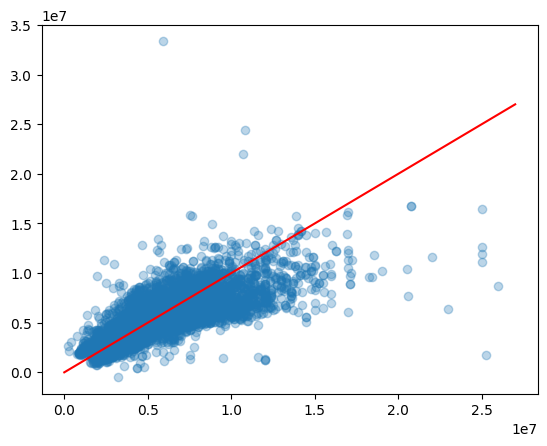

R2: 0.671


In [64]:
fig, ax = plt.subplots()

line = np.linspace(0, 27000000, 2)
plt.plot(line, line, color = 'red')

plt.scatter(y, y_pred, alpha = .3)

plt.show()

print(f'R2: {model.score(X, y):.3f}')

In [67]:
dict(zip(X.columns, model.coef_))

{'Primary room': 1148.2632458001829,
 'Usable area': 26620.480576606944,
 'Gross area': -542.5786467801419,
 'Year of construction': 4043.9125522454324,
 'Floor': 94246.3285707976,
 'Plot size': -5.783210160872319,
 'Joint debt at last sale': -0.37758009840815165,
 'Number of rooms': 125469.94559940785,
 'Number of bedrooms': 43685.41334325395,
 'Turnover rate': 47.01022774355732,
 'Postal code': -1179.943042148771,
 'Broker encoded': 35779.33762981989,
 'Housing type encoded': 76745.21664172156,
 'Balcony_Yes': -21786.804528553588,
 'Parking_Yes': -19623.1556000813,
 'Lat': 13107100.134858962,
 'Lon': 360162.5419041293}